<h2> Figure for selected images from the test dataset with their predictions and true values </h2>

In [ ]:
import numpy as np
import keras
from keras.models import load_model
from keras.preprocessing import image
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#model = load_model("/content/drive/My Drive/dataset_AA2/models/model_1_Xception_150epo_1500data_LR_001_data_augmentation.keras")
model = load_model("/content/drive/My Drive/dataset_AA2/models/model_1_Xception_150epo_1500data.keras")

In [4]:
#create array with all the images
def load_images_from_folder(folder, target_size, selected_images):
    images = []
    for filename in selected_images:
        img_path = os.path.join(folder, filename)
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img)
        img_array /= 255.  # Scale pixel values to [0, 1]
        img_array = img_array*2 -1
        if img_array is not None:
            images.append(img_array)
    return np.array(images)

In [5]:
folder_path = '/content/drive/My Drive/dataset_AA2/images-processed/test/'
#folder_path = '/content/drive/My Drive/dataset_AA2/images-processed/train/'
#folder_path = '/content/drive/My Drive/dataset_AA2/images-processed/validation/'
target_size = (299, 299)  # Set the target size as required by your model

images_selected = ["1008860_ss_ebf380ea42db69ab66304a3358fdf7c64772ab3e.1920x1080.jpg","1085540_ss_96b982dc5d26fec290002c72676331d3aa9c2058.1920x1080.jpg",
                "1095480_ss_70fb5edb2f7d848530bfcb2212b2c8f8b2aa6c42.1920x1080.jpg", "1117090_ss_db603e8cfa5a29b20662d5f36cd807ab77502d3a.1920x1080.jpg"]

images = load_images_from_folder(folder_path, target_size, images_selected)
# Make the prediction

#print(f"The prediction of the image is {prediction} and should be 1749")

In [6]:
predictions = model.predict(images)

1/1 [==============================] - 5s 5s/step


In [7]:
print(predictions)

[[1385.5472]
 [1347.4197]
 [1200.6876]
 [1410.8824]]


In [8]:
dataset = pd.read_csv('/content/drive/My Drive/dataset_AA2/metadata_v2.csv')

In [9]:
#create array with all the images
def load_true_prices_from_folder(folder, selected_images):
    prices = []
    for filename in selected_images:
        price = dataset.loc[dataset["Image Name"]==filename,"Price"].iloc[0]
        if price is not None:
            prices.append(price)
    return np.array(prices)

In [10]:
true_values = load_true_prices_from_folder(folder_path, images_selected)

In [11]:
print(true_values)

[1749  999  499  199]


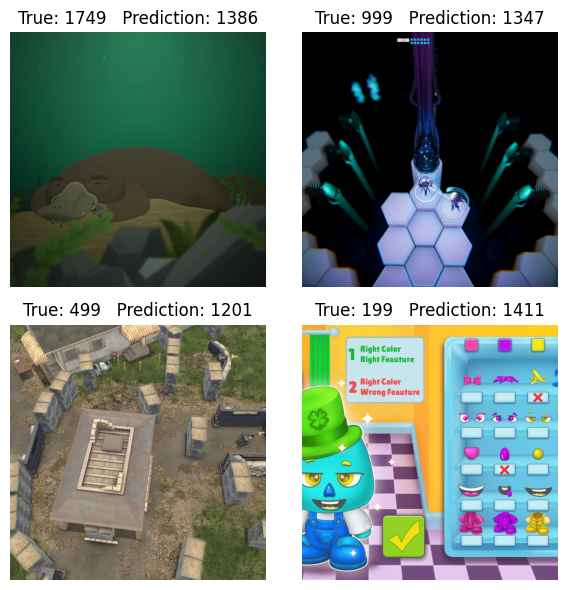

In [12]:
#plot the 9 images
plt.figure(figsize=(6, 6)) #size of the window

i = 0
for path in images_selected:
    plt.subplot(2, 2, i + 1)  # Adjust subplot to 3x3 grid
    img = image.load_img(folder_path+path, target_size=(1080,1080))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True: {true_values[i]}   Prediction: {int(np.round(predictions[i][0]))}")
    i += 1

plt.tight_layout()  # Adjust spacing between subplots
#plt.savefig("/content/drive/My Drive/dataset_AA2/images-processed/some_predictions_on_test_set_with_data_augmentation")
plt.show()